In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
data = pd.read_csv('ICSD/ZrO2.txt', sep='\t')

In [47]:
data = data.drop(['MeasuredDensity', 'Unnamed: 10'], axis=1)

In [48]:
data.head(3)

,CollectionCode,StructuredFormula,StructureType,Reference,StandardisedCellParameter,FormulaUnitsPerCell,Temperature,Pressure,SumFormula
0,66781,Zr O2,Zirconia-ZrO2(HT),"Journal of Materials Science (1995) 30, (*) p1...",3.5960 3.5960 5.1841 90.000 90.000 90.000,2,293.0,0.101325,O2 Zr1
1,66782,Zr O2,Zirconia-ZrO2(HT),"Journal of Materials Science (1995) 30, (*) p1...",3.5958 3.5958 5.1844 90.000 90.000 90.000,2,293.0,0.101325,O2 Zr1
2,66783,Zr O2,Zirconia-ZrO2(HT),"Journal of Materials Science (1995) 30, (*) p1...",3.5957 3.5957 5.1844 90.000 90.000 90.000,2,293.0,0.101325,O2 Zr1


## Creating a new dataframe with the relevant data

In [50]:
df = data.copy()[['CollectionCode', 'StandardisedCellParameter', 'FormulaUnitsPerCell', 'Temperature', 'Pressure', 'SumFormula']]

In [55]:
def get_abc_from_cellparam(parameters):
    splitpar = [float(x) for x in parameters.split(' ')]
    return splitpar[0:3]

def set_abc(df):
    a, b, c = [], [], []
    for idx, row in df.iterrows():
        a_, b_, c_ = get_abc_from_cellparam(row.StandardisedCellParameter)
        a.append(a_)
        b.append(b_)
        c.append(c_)
    
    df['a'] = a
    df['b'] = b
    df['c'] = c
    
    df = df.drop('StandardisedCellParameter', axis=1)
    return df    

In [57]:
df = set_abc(df)

## Finding error bars: lattice parameters at ambient temperature/pressure

In [58]:
room_temp = np.bitwise_and.reduce([
    np.abs(df['Temperature'].values - 293) < 10,
    np.abs(df['Pressure'].values - 0.101325) < 0.01,
    df['SumFormula'] == 'O2 Zr1'
])

In [62]:
df[room_temp][['a', 'b', 'c']].describe()

,a,b,c
count,22.000000,22.000000,22.000000
mean,3.600345,3.600345,5.183936
std,0.011476,0.011476,0.021621
min,3.591600,3.591600,5.152000
25%,3.595725,3.595725,5.177000
50%,3.596100,3.596100,5.182550
75%,3.600125,3.600125,5.184475
max,3.640000,3.640000,5.270000


## Variation of the lattice parameters with respect to the temperature

In [44]:
room_press = np.bitwise_and.reduce([
    df['Temperature'].values > 200,
    np.abs(df['Pressure'].values - 0.101325) < 0.01,
    df['SumFormula'] == 'O2 Zr1'
])

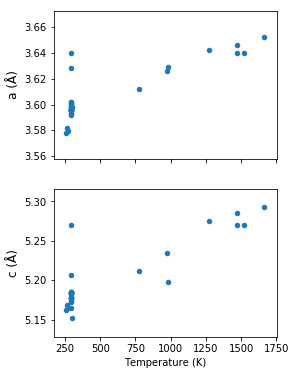

In [71]:
fig, ax_fig = plt.subplots(2, 1, figsize=(4, 6), sharex=True)

for y, ax in zip(['a', 'c'], ax_fig):
    df[room_press].sort_values(by='Temperature').plot(kind='scatter', x='Temperature', y=y, ax=ax)
    ax.set_ylabel('%s (Å)' % y, fontsize=12)

ax.set_xlabel('Temperature (K)')

plt.show()

In [86]:
df_temp = df[room_press][['a', 'c', 'Temperature']].groupby('Temperature').mean().reset_index().copy()

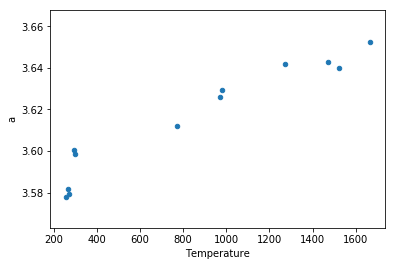

In [88]:
df_temp.plot(kind='scatter', x='Temperature', y='a')